<a href="https://colab.research.google.com/github/MujeebDawar/computerVision_Pyramid-Tecniques-Guasian-and-laplasian-/blob/main/Pyrimid_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mujeeb Rehman       Roll# 240385    MS CGD II

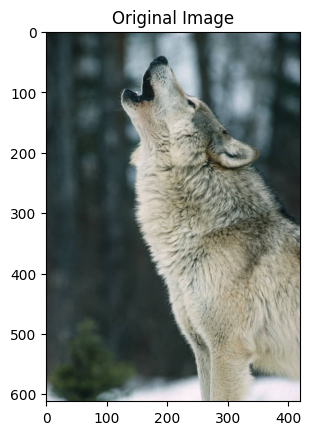

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

# Load the image
image = cv2.imread('Wolf.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.show()



# **Gaussian pyramids**



In [ ]:
# Create a Gaussian pyramid
def gaussian_pyramid(image, levels):
    pyramid = [image]
    for i in range(levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

    # Reconstruct the image from Gaussian pyramid
def reconstruct_from_gaussian(gaussian_pyr):
    reconstructed_image = gaussian_pyr[-1]
    for i in range(len(gaussian_pyr) - 2, -1, -1):
        reconstructed_image = cv2.pyrUp(reconstructed_image)
        # Resize to match the dimensions of the current level
        reconstructed_image = cv2.resize(reconstructed_image, (gaussian_pyr[i].shape[1], gaussian_pyr[i].shape[0]))
    return reconstructed_image


# **laplacian pyramid**


In [ ]:


# Create a Laplacian pyramid
def laplacian_pyramid(image, levels):
    gaussian_pyr = gaussian_pyramid(image, levels)
    pyramid = []
    for i in range(levels,0,-1):
        # Expand the Gaussian image to the size of the next level in the pyramid
        if i < levels - 1:
            gaussian_expanded = cv2.pyrUp(gaussian_pyr[i + 1])
            # Resize to match the original Gaussian level for subtraction
            gaussian_expanded = cv2.resize(gaussian_expanded, (gaussian_pyr[i].shape[1], gaussian_pyr[i].shape[0]))
            laplacian = cv2.subtract(gaussian_pyr[i], gaussian_expanded)
        else:
            # For the last level, we just use the Gaussian image
            laplacian = gaussian_pyr[i]
        pyramid.append(laplacian)
    return pyramid

# Reconstruct the image from Laplacian pyramid
def reconstruct_laplacian(laplacian_pyr):
    reconstructed_image = laplacian_pyr[-1]  # Start from the smallest image in the Laplacian pyramid
    for i in range(len(laplacian_pyr) - 2, -1, -1):
        # Upsample the current level
        reconstructed_image = cv2.pyrUp(reconstructed_image)

        # Resize the upsampled image to match the current level's size
        reconstructed_image = cv2.resize(reconstructed_image, (laplacian_pyr[i].shape[1], laplacian_pyr[i].shape[0]))

        # Add the Laplacian level to the upsampled image
        reconstructed_image = cv2.add(reconstructed_image, laplacian_pyr[i])

    return reconstructed_image




# **Set the number of pyramid levels**

In [ ]:

pyramid_levels = 4

# **Generate Gaussian and Laplacian pyramids**

In [ ]:
gaussian_pyr = gaussian_pyramid(image, pyramid_levels)
laplacian_pyr = laplacian_pyramid(image, pyramid_levels)


**Reconstruct the image from both pyramids**

In [ ]:
reconstructed_image_gaussian = reconstruct_from_gaussian(gaussian_pyr)
reconstructed_image_laplacian = reconstruct_laplacian(laplacian_pyr)


# Ensure the reconstructed images have the same dimensions as the original **image**

In [ ]:
reconstructed_image_gaussian_resized = cv2.resize(reconstructed_image_gaussian, (image.shape[1], image.shape[0]))
reconstructed_image_laplacian_resized = cv2.resize(reconstructed_image_laplacian, (image.shape[1], image.shape[0]))

Calculate **Errors**

In [ ]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original, reconstructed):
    return mean_squared_error(original, reconstructed)

# Function to calculate Peak Signal-to-Noise Ratio (PSNR)
def calculate_psnr(original, reconstructed):
    return peak_signal_noise_ratio(original, reconstructed)

# Function to calculate Structural Similarity Index (SSIM)
def calculate_ssim(original, reconstructed):
    # Calculate SSIM with an appropriate win_size and channel_axis for multichannel images
    ssim_value, _ = structural_similarity(original, reconstructed, win_size=3, channel_axis=-1, full=True)
    return ssim_value

In [ ]:
# Calculate MSE, PSNR, and SSIM for Gaussian Pyramid reconstruction
mse_gaussian = calculate_mse(image, reconstructed_image_gaussian_resized)
psnr_gaussian = calculate_psnr(image, reconstructed_image_gaussian_resized)
ssim_gaussian = calculate_ssim(image, reconstructed_image_gaussian_resized)

# Calculate MSE, PSNR, and SSIM for Laplacian Pyramid reconstruction
mse_laplacian = calculate_mse(image, reconstructed_image_laplacian_resized)
psnr_laplacian = calculate_psnr(image, reconstructed_image_laplacian_resized)
ssim_laplacian = calculate_ssim(image, reconstructed_image_laplacian_resized)



**# Plot Gaussian pyramid levels**

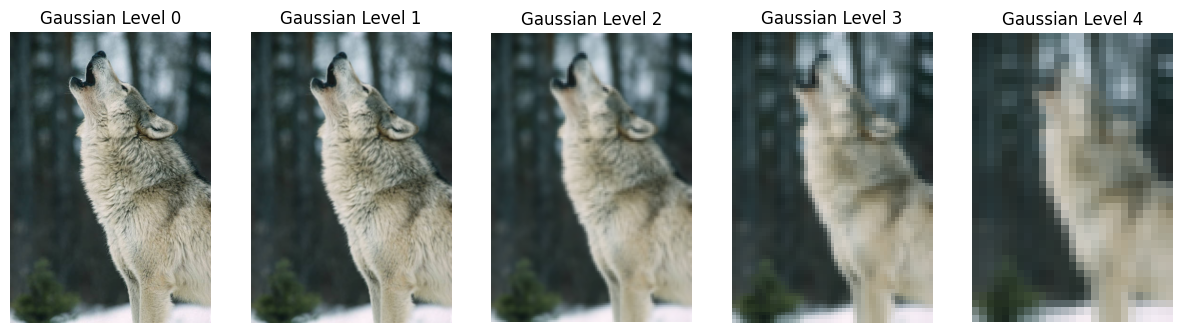

In [ ]:
# Plot Gaussian pyramid levels
plt.figure(figsize=(15, 5))
for i, img in enumerate(gaussian_pyr):
    plt.subplot(1, len(gaussian_pyr), i + 1)
    plt.imshow(img)
    plt.title(f'Gaussian Level {i}')
    plt.axis('off')
plt.show()

# Plot Laplacian pyramid levels

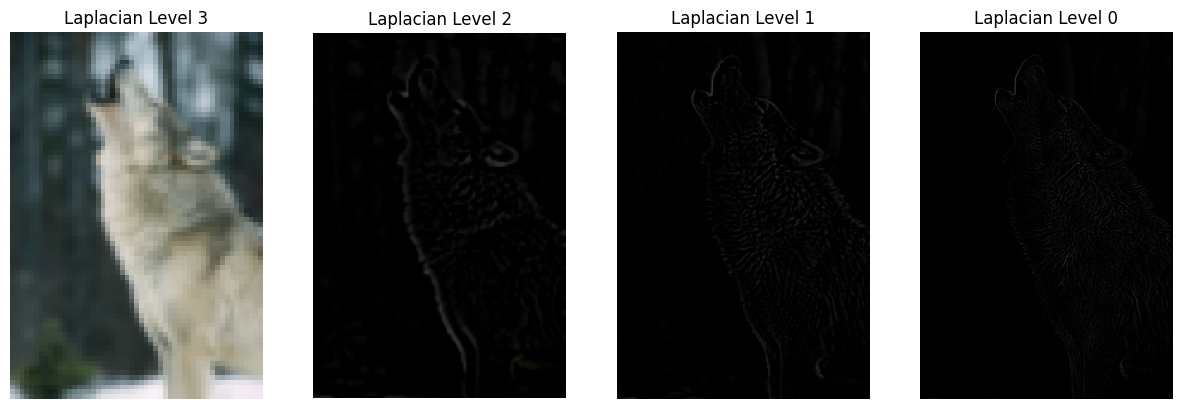

In [ ]:
# Plot Laplacian pyramid levels in descending order
plt.figure(figsize=(15, 5))
for i, img in enumerate(reversed(laplacian_pyr)):
    plt.subplot(1, len(laplacian_pyr), i + 1)
    plt.imshow(img)
    plt.title(f'Laplacian Level {len(laplacian_pyr) - 1 - i}')  # Displaying levels in descending order
    plt.axis('off')
plt.show()

# **comparison**

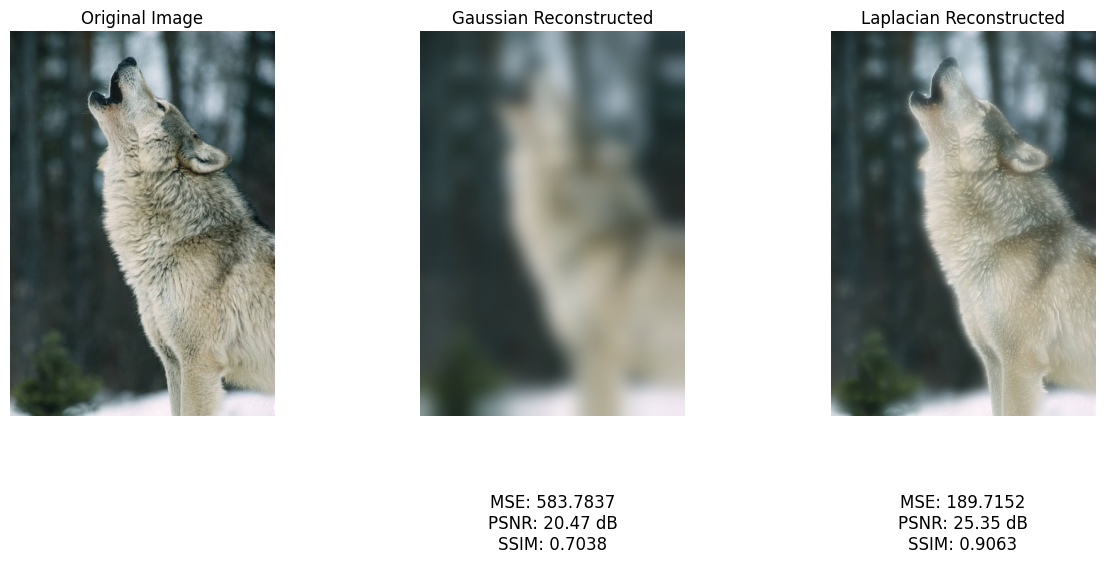

In [ ]:
# Display the original and reconstructed images for comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image_gaussian_resized)
plt.title('Gaussian Reconstructed')
plt.axis('off')

# Show error metrics for Gaussian reconstruction
plt.text(0.5, -0.2, f'MSE: {mse_gaussian:.4f}\nPSNR: {psnr_gaussian:.2f} dB\nSSIM: {ssim_gaussian:.4f}',
         ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)


plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image_laplacian_resized)
plt.title('Laplacian Reconstructed')
plt.axis('off')

# Show error metrics for Laplacian reconstruction
plt.text(0.5, -0.2, f'MSE: {mse_laplacian:.4f}\nPSNR: {psnr_laplacian:.2f} dB\nSSIM: {ssim_laplacian:.4f}',
         ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.show()



